In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread("C:/Computer Vision/Cats and Dogs/PetImages/Cat/4.jpg")
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:
cat4.shape

(375, 500, 3)

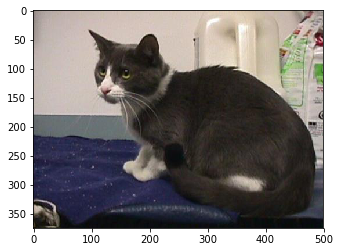

In [4]:
plt.imshow(cat4)

In [8]:
dog2 = cv2.imread("C:/Computer Vision/Cats and Dogs/PetImages/Dog/2.jpg")
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [9]:
dog2.shape

(199, 188, 3)

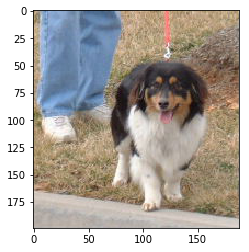

In [10]:
plt.imshow(dog2)

## Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes 
more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this 
automatically for us.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [12]:
image_gen = ImageDataGenerator(
    rotation_range=30, # Rotate the image by 30 degrees
    width_shift_range=0.1, # Shift the image horizontally by 10% of the width
    height_shift_range=0.1, # Shift the image vertically by 10% of the height
    rescale=1 / 255, # Rescale the image by normalizing pixel values to the range [0, 1]
    shear_range=0.2, # Shear the image by 20%, which distorts the image by cutting away parts
    zoom_range=0.2, # Zoom in on the image by up to 20%
    horizontal_flip=True, # Allow horizontal flipping of the image
    fill_mode='nearest' # Fill in missing pixels after transformations with the nearest pixel value
)

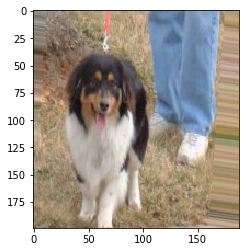

In [13]:
plt.imshow(image_gen.random_transform(dog2))

In [14]:
image_gen.flow_from_directory("C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory("C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/test")

Found 6251 images belonging to 2 classes.


# Resizing Images
Let's have Keras resize all the images to 150px by 150px once they've been manipulated

In [16]:
# Width, height, channels 
image_shape = (150,150,3)

### Creating the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [19]:
model.add(Dense(64))
model.add(Activation('relu'))

# Dropout help reduce overfitting by randomly turning neurons off during training 
# Here we say randomly turn off 50% of neurons 

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5308480   
_________________________________________________________________
activation (Activation)      (None, 64)                0         
__________

### Train the model

In [22]:
batch_size = 16

# Assuming image_gen is an instance of ImageDataGenerator
train_image_gen = image_gen.flow_from_directory(
    "C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/train",  # Directory containing the images
    target_size=image_shape[:2],       # Resize images to match the target size
    batch_size=batch_size,             # Number of images to return in each batch
    class_mode='binary'                # Mode for labels: 'binary' for binary classification
)

# image_gen is likely an instance of the ImageDataGenerator class from Keras.
# This class provides a way to generate batches of tensor image data with real-time data augmentation.
# The flow_from_directory method is used to load images from a directory in a structured way.
# target_size=image_shape[:2]: Resize the images to match the specified target size.

Found 18743 images belonging to 2 classes.


In [23]:
test_image_gen = image_gen.flow_from_directory(
    "C:/Computer Vision/Cats and Dogs/PetImages/CATS_DOGS/test",  
    target_size=image_shape[:2],       
    batch_size=batch_size,             
    class_mode='binary'                
)

Found 6251 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=10,
                             steps_per_epoch = 15,
                             validation_data = test_image_gen,
                             validation_steps=12)

Epoch 1/10
14/15 [===========================>..] - ETA: 10s - loss: 1.0961 - acc: 0.5000

In [ ]:
results.history['acc']

In [ ]:
plt.plot(results.history['acc'])